In [65]:
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import pytrends
from pytrends.request import TrendReq
import time
import datetime
from datetime import datetime, date, time
pd.set_option('display.max_columns', None)

In [27]:
full_df=pd.read_json('https://api.covidtracking.com/v1/states/daily.json')
full_df


,date,state,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201007,AK,9861.0,NaN,480213.0,NaN,490074.0,46.0,NaN,NaN,NaN,6.0,NaN,5626.0,A,10/7/2020 03:59,2020-10-07T03:59:00Z,10/06 23:59,59.0,NaN,2020-10-07T03:59:00Z,490074.0,9099.0,480682.0,9861.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,274,10426,490074,posNeg,10700,490074,1,0,1a883e2869ef7b3a3c422abb9a41a55364b84ae5,0,0,0,0,0,
1,20201007,AL,161418.0,19126.0,1038526.0,NaN,1180818.0,777.0,17915.0,NaN,1867.0,NaN,1057.0,67948.0,A,10/7/2020 11:00,2020-10-07T11:00:00Z,10/07 07:00,2601.0,17915.0,2020-10-07T11:00:00Z,1180818.0,NaN,NaN,142292.0,2454.0,147.0,NaN,NaN,NaN,NaN,NaN,59483.0,NaN,NaN,NaN,NaN,NaN,NaN,1,941,7233,1199944,posNeg,7971,1199944,21,216,b677706c829d281111e03e6b30854b2b3f106914,0,0,0,0,0,
2,20201007,AR,88880.0,3966.0,1003441.0,NaN,1087671.0,538.0,5740.0,237.0,NaN,98.0,715.0,80703.0,A+,10/7/2020 00:00,2020-10-07T00:00:00Z,10/06 20:00,1482.0,5740.0,2020-10-07T00:00:00Z,1087671.0,NaN,1003441.0,84914.0,1337.0,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23346.0,4228.0,21856.0,3300.0,5,809,0,1092321,posNeg,0,1092321,35,82,3c2e6abdabaccdd357b1c2fd6d7fec6738e065b3,0,0,0,0,0,
3,20201007,AS,0.0,NaN,1616.0,NaN,1616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,10/1/2020 00:00,2020-10-01T00:00:00Z,09/30 20:00,0.0,NaN,2020-10-01T00:00:00Z,1616.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1616,posNeg,0,1616,0,0,993f0592cbe6f9ba149c02096a4b96e1279caad8,0,0,0,0,0,
4,20201007,AZ,222538.0,4792.0,1300948.0,NaN,1518694.0,681.0,20050.0,147.0,NaN,66.0,NaN,36336.0,A+,10/7/2020 00:00,2020-10-07T00:00:00Z,10/06 20:00,5733.0,20050.0,2020-10-07T00:00:00Z,NaN,NaN,NaN,217746.0,5447.0,286.0,NaN,1518694.0,298414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,604,6675,1523486,posNeg,7267,1523486,20,63,0a9c9654f4ee87e874ee29587cd1591984c9547c,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12189,20200124,WA,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,None,None,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,posNeg,0,0,0,0,b1f2a84dc9c1dccf48ce50762ab5c26d6cd9fdcb,0,0,0,0,0,
12190,20200123,MA,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,None,None,NaN,NaN,None,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,0,0,0,totalTestsViral,1,0,0,0,1fbee1a479759db1c67d025df03ff05cc99c54f4,0,0,0,0,0,
12191,20200123,WA,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,None,None,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,posNeg,0,0,0,0,6d8483a5b36b020c032945d12918c1a6c3f3ae27,0,0,0,0,0,
12192,20200122,MA,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,None,None,NaN,NaN,None,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,0,0,0,totalTestsViral,0,0,0,0,9c98a5d410dd4b073b9b9be37b9d0a57b754f4b1,0,0,0,0,0,


In [86]:
#Edited df with mostly full information (Not a lot of NaN's)
json=pd.read_json('https://api.covidtracking.com/v1/states/daily.json')
json
json.shape


(12194, 55)

In [91]:
df=json[['date','state','positive','negative','death','hospitalized','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease']]
df.head(50)

,date,state,positive,negative,death,hospitalized,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20201007,AK,9861.0,480213.0,59.0,NaN,1,0,10426,274,10700
1,20201007,AL,161418.0,1038526.0,2601.0,17915.0,21,216,7233,941,7971
2,20201007,AR,88880.0,1003441.0,1482.0,5740.0,35,82,0,809,0
3,20201007,AS,0.0,1616.0,0.0,NaN,0,0,0,0,0
4,20201007,AZ,222538.0,1300948.0,5733.0,20050.0,20,63,6675,604,7267
5,20201007,CA,831225.0,14725481.0,16228.0,NaN,51,0,123521,2764,126285
6,20201007,CO,74191.0,896400.0,1983.0,7721.0,15,28,7316,654,15070
7,20201007,CT,59364.0,1692681.0,4522.0,11699.0,1,0,7488,123,7611
8,20201007,DC,15697.0,396959.0,632.0,NaN,1,0,2582,45,2627
9,20201007,DE,21550.0,277623.0,649.0,NaN,3,0,1576,84,1660


After looking through the data I decided to use only the columns that were being consistently reported by most states. These columns are also the most informative.

                              date  positive  negative   pending     death  \
date                      1.000000  0.388658  0.407487  0.020162  0.263948   
positive                  0.388658  1.000000  0.888830  0.109706  0.801061   
negative                  0.407487  0.888830  1.000000  0.099872  0.737518   
pending                   0.020162  0.109706  0.099872  1.000000  0.073589   
death                     0.263948  0.801061  0.737518  0.073589  1.000000   
hospitalized              0.197950  0.839481  0.799346  0.476607  0.933246   
deathIncrease            -0.019422  0.414810  0.231876  0.125648  0.338381   
hospitalizedIncrease     -0.014890  0.103683  0.017662  0.053676  0.100698   
negativeIncrease          0.268779  0.726316  0.812680  0.085340  0.660171   
positiveIncrease          0.169714  0.614435  0.497002  0.114085  0.346870   
totalTestResultsIncrease  0.287694  0.733195  0.808304  0.092484  0.661744   

                          hospitalized  deathIncrease  hospital

<Figure size 720x7200 with 0 Axes>

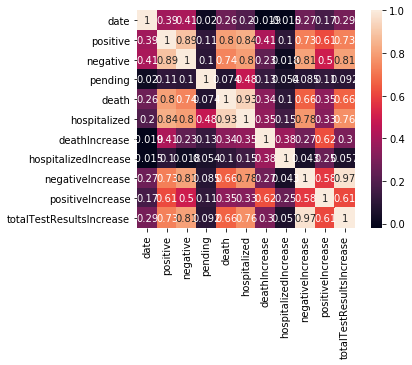

<Figure size 720x7200 with 0 Axes>

In [72]:
corrMatrix=corrleationaldf.corr()
print(corrMatrix)
plt.figure()
fig=sns.heatmap(corrMatrix,annot=True, square=True)
plt.figure(figsize=(10,100))


I would say there is no real surpising data here. The strongest correlated metrics are measurements that well... you would expect to be highly correlated. For example positive and negative (tests), as well as the total test results increase and negative tease results increase.

          location        date  new_cases  new_deaths  total_cases  \
199  United States  2020-10-07    78427.0      4928.0    7501612.0   
89           India  2020-10-07    97894.0      2003.0    6757131.0   
27          Brazil  2020-10-07    69074.0      1595.0    4969141.0   
157         Russia  2020-10-07    11656.0       312.0    1237504.0   
42        Colombia  2020-10-07    13056.0       400.0     869808.0   
150           Peru  2020-10-07    10143.0      3935.0     832929.0   
177          Spain  2020-10-06    31785.0      1179.0     825410.0   
7        Argentina  2020-10-07    17213.0      3351.0     824455.0   
125         Mexico  2020-10-07     9556.0      1091.0     769558.0   
174   South Africa  2020-10-07    13944.0       572.0     683242.0   

     total_deaths  weekly_cases  weekly_deaths  biweekly_cases  \
199      210909.0      471615.0        19006.0        930343.0   
89       104555.0      652390.0         8176.0       1286808.0   
27       147494.0      324751.0

Text(0.5, 0.98, 'Bar and Pie Chart')

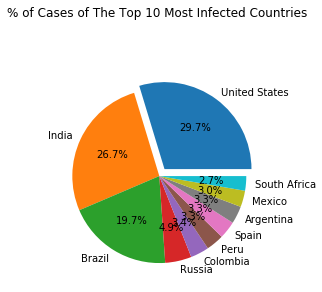

<Figure size 576x432 with 0 Axes>

In [75]:
#Pie chart
covid_data= pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
result = covid_data.groupby('location', as_index=False).max().sort_values(by='total_cases', ascending=False)[:11]
result=result.drop(result.index[0])
x=result['total_cases']
y=result['total_deaths']
explode=(.1,.0,0,0,0,0,0,0,0,0)
pd.set_option('display.max_column', None)
print(result)
plt.title('% of Cases of The Top 10 Most Infected Countries \n\n \n')
plt.pie(x,explode=explode, autopct='%1.1f%%',labels=result['location'])


The US currently leads the globe in percent of total cases. In the future I would like to make another pie chart measuring the percent cases, however adjust for total population size.

            5G  COVID Symptoms isPartial
date                                    
2019-12-01  14               0     False
2019-12-08  11               0     False
2019-12-15  11               0     False
2019-12-22  12               0     False
2019-12-29  12               0     False
2020-01-05  11               0     False
2020-01-12  11               0     False
2020-01-19  11               0     False
2020-01-26  10               0     False
2020-02-02  15               0     False
2020-02-09  13               0     False
2020-02-16  16               0     False
2020-02-23  15               2     False
2020-03-01  15               8     False
2020-03-08  18              43     False
2020-03-15  28              96     False
2020-03-22  25             100     False
2020-03-29  69              85     False
2020-04-05  80              61     False
2020-04-12  32              44     False
2020-04-19  24              39     False
2020-04-26  20              39     False
2020-05-03  18  

,query,value
0,is coronavirus airborne,100
1,north dakota coronavirus,70
2,massachusetts coronavirus cases,40


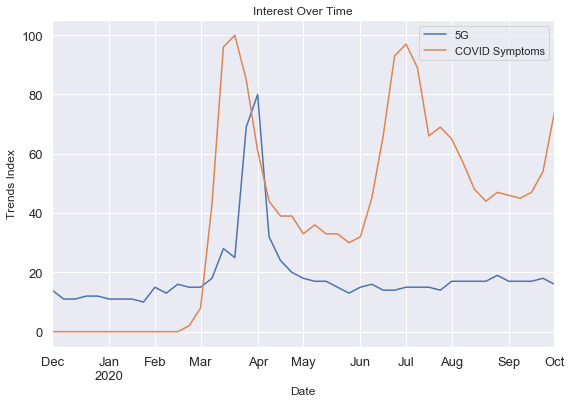

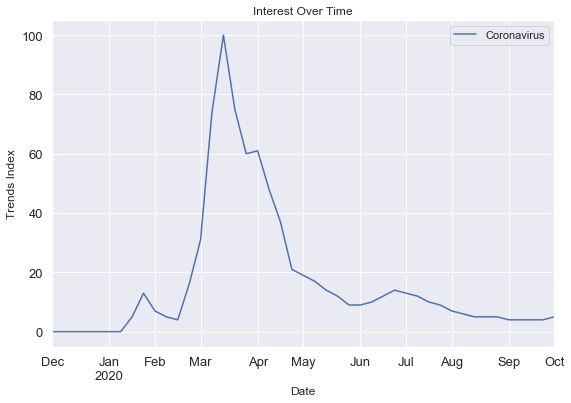

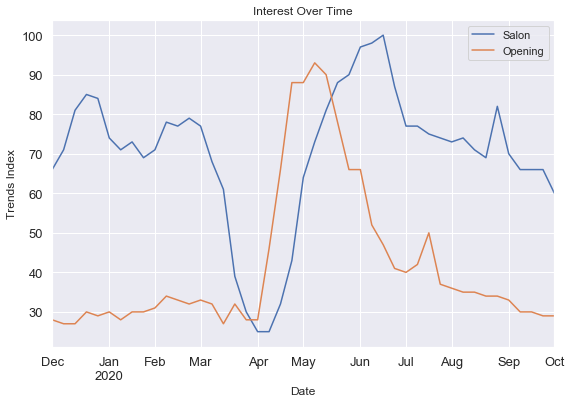

In [83]:
pytrend=TrendReq()
pytrend.build_payload(kw_list=['5G', 'COVID Symptoms'], timeframe='2019-12-01 2020-10-07', geo = 'US')
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df)

sns.set(color_codes=True)
dx = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

pytrend.build_payload(kw_list=['Coronavirus'], timeframe='2019-12-01 2020-10-07', geo = 'US')
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df)

sns.set(color_codes=True)
dx = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)
               
pytrend.build_payload(kw_list=['Salon', 'Opening'], timeframe='2019-12-01 2020-10-07', geo = 'US')
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df)

sns.set(color_codes=True)
dx = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

pytrend.build_payload(kw_list=['Coronavirus'], geo = 'US', timeframe = 'now 1-d', cat = 0)
related_queries= pytrend.related_queries()
dg=related_queries.get('Coronavirus').get('rising')
dg.head(5)

We are able to draw some interesting conclusions from these pytrends charts. Right now we can see the most trending google search is "Is COVID airborne". This makes sense as there has been a lot of debate lately as to how long COVID survives in the air. Looking at the charts now, we can see that the conspiracy theory that 5G technology causes COVID peaked in late April/early May. This is around the time that COVID reached it's peak amount of Google searches. Lastly we can see that the words "Salon" and "Opening" peaked around the same time in early April. This is when President Trump started to campaign to reopen the country. During this time one of the things individuals wanted to do most was get a haircut after a long quarentine. While these two words declined in popularity over time we can see Salon get another spike in early September, when Nancy Pelosi was spotted not wearing a mask inside of a salon.

**Note that these are only US trends